# **Приоритизация гипотез и анализ результатов А/В-теста**

**Заказчик:**
  крупный интернет-магазин.

**Цель исследования:** 
- составить отсортированный по убыванию приоритета список гипотез по увеличению выручки;
- провести анализ результатов А/В-теста;
- обосновать целесообразность продолжения/остановки А/В-теста.

**Этапы исследования:**
- приоритизации гипотез с применением фреймворка ICE;
- приоритизации гипотез с применением фреймворка RICE;
- анализ результатов А/В-теста.

**Источники данных:**
  отдел маркетинга интернет-магазина.
  
**Данные:**
- ***hypothesis.csv*** - файл с гипотезами и параметрами приоритизации, 
- ***orders.csv*** - файл с данными о заказах,
- ***visitors.csv*** — файл с данными о пользователях.

**Структура файлов  (названия столбцов):**

Структура ***hypothesis.csv***:
- __Hypothesis__ — краткое описание гипотезы;
- __Reach__ — охват пользователей по 10-балльной шкале;
- __Impact__ — влияние на пользователей по 10-балльной шкале;
- __Confidence__ — уверенность в гипотезе по 10-балльной шкале;
- __Efforts__ — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

Структура ***orders.csv***:
- __transactionId__ — идентификатор заказа;
- __visitorId__ — идентификатор пользователя, совершившего заказ;
- __date__ — дата, когда был совершён заказ;
- __revenue__ — выручка заказа;
- __group__ — группа A/B-теста, в которую попал заказ.


Структура ***visitors.csv***:
- __date__ — дата;
- __group__ — группа A/B-теста;
- __visitors__ — количество пользователей в указанную дату в указанной группе A/B-теста.

<a id='seven'></a>
[К выводам](#eight)

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

## **Приоритизация гипотез.**


### Загрузка данных и подготовка к анализу

#### Загрузка файла

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

#### Проверка качества данных в датасете

In [3]:
# функция для первичного знакомства с новым датасетом
def first_info(df):
    print('Вывод первых 5 строк датасета:', end='\n\n')
    print(df.head(), end='\n\n')
    print('Вывод общей информации по датасету:', end='\n\n')
    print(df.info(), end='\n\n')
    print('Проверка количественных данных:', end='\n\n')
    print(df.describe(), end='\n\n')
    print('Количество дубликатов по датасету:', df.duplicated().sum(), end='\n\n')
    return 

In [4]:
# первичное знакомство с датасетом data
first_info(data)

Вывод первых 5 строк датасета:

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  

Вывод общей информации по датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts 

**Выводы:**

- названия столбцов необходимо привести к стандартному виду;
- типы данных указаны верно;
- пропусков в датасете нет;
- полных дубликатов в датасете нет;
- всего 5 столбцов, 9 строк.

Таким образом,

нам предложено 9 гипотез по повышению выручки интернет-магазина и 4 параметра их приоритезации - Reach, Impact, Confidence, Efforts, рассчитанные по шкале от 0 до 10.

Приоритизацию гипотез можно провести и с помощью фреймворка ICE, и с помощью фреймворка RICE.

In [5]:
# переименование стобцов
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Приоритизация гипотез: фреймворк ICE 

In [6]:
# настройка формата вывода таблицы
pd.options.display.max_colwidth = 110

In [7]:
# создание столбца 'ice'
data['ice'] = (data['impact'] * data['confidence'])/data['efforts']
data['rank_ice'] = data['ice'].rank(method='first', ascending=False).astype('int')
(
    data[['hypothesis', 'ice', 'rank_ice']]
    .round(2)
    .sort_values(by='ice', ascending=False)
    .style
    .background_gradient(cmap='mako_r', axis=0, subset=['rank_ice'])
)

,hypothesis,ice,rank_ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,2
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,9


### Приоритизация гипотез: фреймворк RICE 

In [8]:
# создание столбца 'rice'
data['rice'] = (data['impact'] * data['confidence'] * data['reach'])/data['efforts']
data['rank_rice'] = data['rice'].rank(method='first', ascending=False).astype('int')
(
    data[['hypothesis', 'rice', 'rank_rice']]
    .round(2)
    .sort_values(by='rice', ascending=False)
    .style
    .background_gradient(cmap='mako_r', axis=0, subset=['rank_rice'])
)

,hypothesis,rice,rank_rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,4
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,9


### Приоритизация гипотез: вывод

In [9]:
# вывод промежуточной таблицы для сравнения результатов приоритизации фреймворками ice и rice
rank_data = data[['hypothesis', 'reach', 'ice', 'rank_ice', 'rice', 'rank_rice']].round(2).sort_values(by='rice', ascending=False)
(
    rank_data
    .style
    .background_gradient(cmap='mako_r', axis=0, subset=['rank_ice', 'rank_rice'])
)

,hypothesis,reach,ice,rank_ice,rice,rank_rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,11.200000,3,112.000000,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,7.000000,5,56.000000,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,13.330000,2,40.000000,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,8.000000,4,40.000000,4
8,"Запустить акцию, дающую скидку на товар в день рождения",1,16.200000,1,16.200000,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,1.120000,8,9.000000,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,2.000000,6,4.000000,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,1.330000,7,4.000000,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1.000000,9,3.000000,9


**Вывод**

- согласно фреймворку ICE самые приоритетные гипотезы: 8, 0, 7;
- согласно фреймворку RICE самые приоритетные гипотезы: 7, 2, 0;
- фреймворк RICE учитывает показатель reach, оценивающий количество пользователей, которых затронет гипотеза, следовательно, оценку данного фреймворка можно считать более точной.

Таким образом, тройка самых приоритетных гипотез:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(гипотеза №7);
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (гипотеза №2);
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза №0).

# **Анализ результатов A/B-теста.**

## Загрузка данных и подготовка к анализу

### файл с данными о заказах

In [10]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [11]:
# первичное знакомство с датасетом orders
first_info(orders)

Вывод первых 5 строк датасета:

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

Вывод общей информации по датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Проверка количественных данных:

       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03

**Выводы:**

- названия столбцов необходимо привести к стандартному виду;
- необходимо заменить тип данных в столбце date;
- пропусков в датасете нет;
- полных дубликатов в датасете нет;
- всего 5 столбцов, 1197 строк.

In [12]:
# переименование столбцов
orders.columns = orders.columns.str.lower().str.replace('id', '_id')
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [13]:
# замена типа данных в столбце orders['date'] - способ из прошлых уроков
orders['date'] = pd.to_datetime(orders['date'])

Полных дубликатов в датафрейме orders. Однако нам интересна следующая информация:
- количество групп, участвующих в А/В тесте;
- количество пользователей в каждой группе;
- наличие/отсутствие пользователей, задействованных в нескольких группах одновременно;
- дата начала/окончания тестового периода

In [14]:
# вывод на экран уникальных групп, участвующих в А/В-тесте
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [15]:
# количество уникальных id пользователей, оформивших заказ в тестовом периоде
orders['visitor_id'].nunique()

1031

In [16]:
# Количество дубликатов в столбце orders['visitor_id']
orders['visitor_id'].duplicated().sum()

166

In [17]:
# Количество пользователей в А-группе
orders.loc[orders['group']=='A', 'visitor_id'].nunique()

503

In [18]:
# Количество пользователей в В-группе
orders.loc[orders['group']=='B', 'visitor_id'].nunique()

586

In [19]:
# Количество пользователей, задействованных одновременно в двух группах
orders.groupby('visitor_id').agg({'group':'nunique'}).value_counts()

group
1        973
2         58
dtype: int64

In [20]:
# Дата начала теста
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [21]:
# Последняя отчетная дата
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

**Выводы:**

- тестирование ведется в разрезе двух групп: А и В;
- дата начала теста 2019-08-01, последняя отчетная дата - 2019-08-31;
- имеется 1031 уникальный пользователь (visitor_id);
- в А-группе  - 503 уникальных пользователя оформили заказ;
- в В-группе - 586 уникальных пользователей оформили заказ;
- 58 пользователей попали и в А, и в В группы (503+586-58=1031).

Таким образом, 

тестирование ведется в течение месяца, в А-группе пользователй, совершивших покупку меньше, чем в В-группе ((586-503)/503) на 16.5%. По неизвестной причине 58 пользователей одновременно числятся в двух группах - это 11.5% от А-группы и 9.9% от В-группы или 5,6% от общего количества уникальных пользователей. **Думаю, этих пользователей нужно исключить из анализа результатов АВ-теста.** 

In [22]:
#  сохраню копию orders перед удалением дублирующихся в группах пользователей
orders_old = orders.copy(deep=True)

In [23]:
# удаляем пользователей, задействованных одновременно в двух группах
mask = orders.groupby('visitor_id', as_index=False).agg({'group' : 'nunique'}).query('group>1')['visitor_id'].unique()
orders = orders.query('visitor_id not in @mask')

# проверим корректность исполнения кода
orders.groupby('visitor_id').agg({'group':'nunique'}).value_counts()

group
1        973
dtype: int64

### файл с данными о пользователях

In [24]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [25]:
# первичное знакомство с датасетом visitors
first_info(visitors)

Вывод первых 5 строк датасета:

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

Вывод общей информации по датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Проверка количественных данных:

         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000

Количество дубликатов по датасету: 0



<a id='nine'></a>
[К выводу](#ten)

In [26]:
# Среднее количество пользователей в день (А-группа)
visitors_A_mean = visitors[visitors['group']=='A']['visitors'].mean().round()
visitors_A_mean

604.0

In [27]:
# Среднее количество пользователей в день (B-группа)
visitors_B_mean = visitors[visitors['group']=='B']['visitors'].mean().round()
visitors_B_mean

610.0

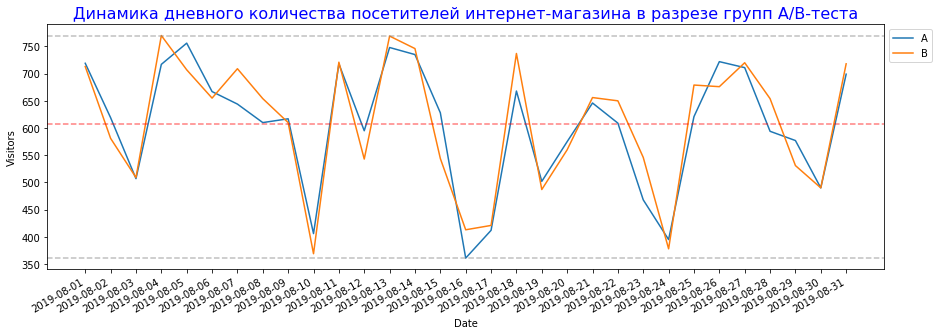

In [28]:
# построим график дневного количества пользователей, посетивших интерне-магазин в тестовом периоде, в разрезе групп
fig, ax = plt.subplots()

plt.plot(visitors[visitors['group']=='A']['date'], visitors[visitors['group']=='A']['visitors'], label='A')
plt.plot(visitors[visitors['group']=='B']['date'], visitors[visitors['group']=='B']['visitors'], label='B')

fig.set_figwidth(15)
fig.set_figheight(5)
fig.autofmt_xdate()
#plt.grid(True, axis='x', alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.axhline(y=visitors['visitors'].min(), color='grey', linestyle='--', alpha=0.5)
plt.axhline(y=visitors['visitors'].max(), color='grey', linestyle='--', alpha=0.5)
plt.axhline(y=visitors['visitors'].mean(), color='red', linestyle='--', alpha=0.5)
plt.title('Динамика дневного количества посетителей интернет-магазина в разрезе групп А/В-теста', size=16, color='blue')
plt.show();

In [29]:
# Минимальная дата в столбце visitors['date']
visitors['date'].min()

'2019-08-01'

In [30]:
# Максимальная дата в столбце visitors['date']
visitors['date'].max()

'2019-08-31'

**Выводы:**

- названия столбцов стандартные;
- необходимо заменить тип данных в столбце date;
- пропусков в датасете нет;
- полных дубликатов в датасете нет;
- в датасете представлены данные за период с 2019-08-01 по 2019-08-31 (что соответствует датасету orders);
- всего 3 столбца, 62 строки.

Разделение на группы прошло успешно, ежедневно количество пользователей в каждой группе примерно одинаковое и колеблится в диапазоне от 350 до 750 человек. Тенденции к росту или снижению количества пользователей нет.

К сожалению, нет возможности очистить датафрейм visitors от пользователей, попавших по неизвестной причине в обе группы теста.

In [31]:
# заменим ти данных в столбце visitors['date'] - способ из теории текущего спринта
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

## Анализ кумулятивной выручки по группам

In [32]:
#создадим массив уникальных пар: дата-группа
date_groups = orders[['date', 'group']].drop_duplicates()
#date_groups.style.set_caption('Массив уникальных пар: дата-группа')
date_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [33]:
#создадим датафрейм с агрегированными кумулятивными данными по заказам

order_agg = (
    date_groups.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])]
                      .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
)
order_agg.head(2)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758


In [34]:
#создадим датафрейм с агрегированными кумулятивными данными по посетителям

visitor_agg = (
    date_groups.apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]
                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
)
visitor_agg.head(2)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713


In [35]:
#объединим агрегированные данные по заказам и по пользователям в один датафрейм

cumulative_data = (
    order_agg.merge(visitor_agg, left_on=['date', 'group'], right_on=['date', 'group'])
)
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head(2)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713


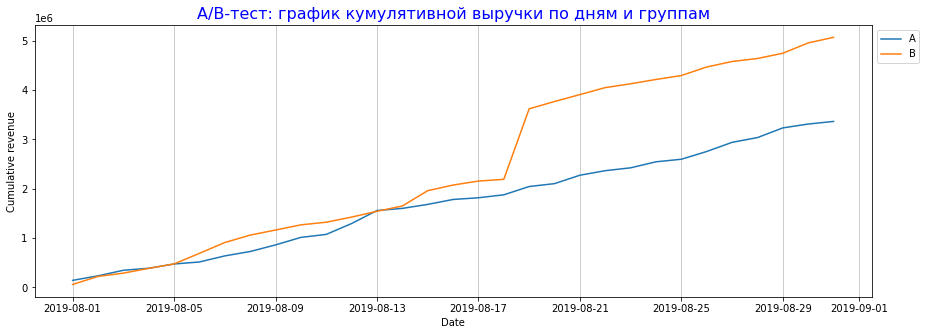

In [36]:
# построим график кумулятивной выручки по дням и группам А/В-теста

cum_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]
cum_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]

fig, ax = plt.subplots()

plt.plot(cum_revenue_a['date'], cum_revenue_a['revenue'], label='A')
plt.plot(cum_revenue_b['date'], cum_revenue_b['revenue'], label='B')

fig.set_figwidth(15)
fig.set_figheight(5)
plt.grid(True, axis='x', alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.title('А/В-тест: график кумулятивной выручки по дням и группам', size=16, color='blue')
plt.show;

**Вывод:**

- кумулятивная выручка растет в течение всего теста в обеих группах;
- В-группа приносит больше выручки, чем А-группа;
- темп роста выручки в В-группе выше, чем в А-группе;
- на графике выручки В-группы 18-19 августа наблюдается резкий рост. Это может сигнализировать либо о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Позже проанализируем выбросы.

## Анализ кумулятивного среднего чека по группам

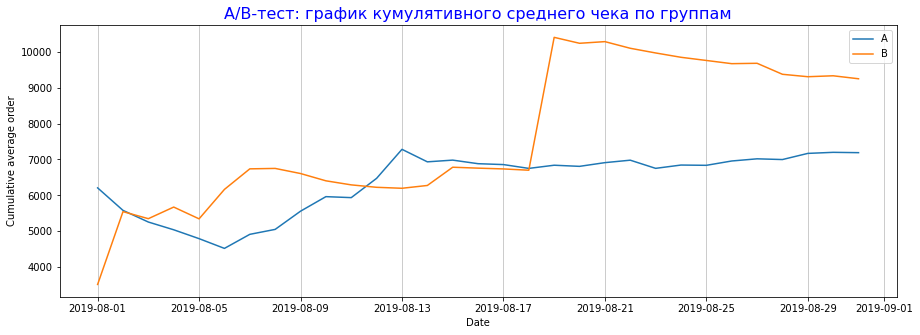

In [37]:
# построим график кумулятивного среднего чека по группам

fig, ax = plt.subplots()

plt.plot(cum_revenue_a['date'], cum_revenue_a['revenue']/cum_revenue_a['orders'], label='A')
plt.plot(cum_revenue_b['date'], cum_revenue_b['revenue']/cum_revenue_b['orders'], label='B')

plt.grid(True, axis='x', alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Cumulative average order')
plt.title('А/В-тест: график кумулятивного среднего чека по группам', size=16, color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show;

**Вывод**

- средний чек А-группы стабилизировался с середины августа;
- средний чек В-группы резко вырос 18-19 августа, затем пошел на спад. Скорее всего причиной стал крупный заказ/заказы, для того чтобы средний чек по В-группе пришел к реальному среднему и установился на его уровне нужно больше данных.
- наличие выброса в В-группе на данном этапе затрудняет сравнительный анализ кумулятивного среднего чека по группам.

In [38]:
# Удалим заказ с максимальной стоимостью из таблицы orders и пересчитаем все промежуточные таблицы
orders0 = orders[orders['revenue']!=orders['revenue'].max()]
date_groups0 = orders0[['date', 'group']].drop_duplicates()
order_agg0 = (
    date_groups0.apply(lambda x: orders0[np.logical_and(orders0['date']<=x['date'], orders0['group']==x['group'])]
                      .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
)
visitor_agg0 = (
    date_groups0.apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])]
                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
    .sort_values(by=['date', 'group'])
)
cumulative_data0 = (
    order_agg0.merge(visitor_agg0, left_on=['date', 'group'], right_on=['date', 'group'])
)
cumulative_data0.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cum_revenue_a0 = cumulative_data0[cumulative_data0['group']=='A'][['date', 'revenue', 'orders']]
cum_revenue_b0 = cumulative_data0[cumulative_data0['group']=='B'][['date', 'revenue', 'orders']]

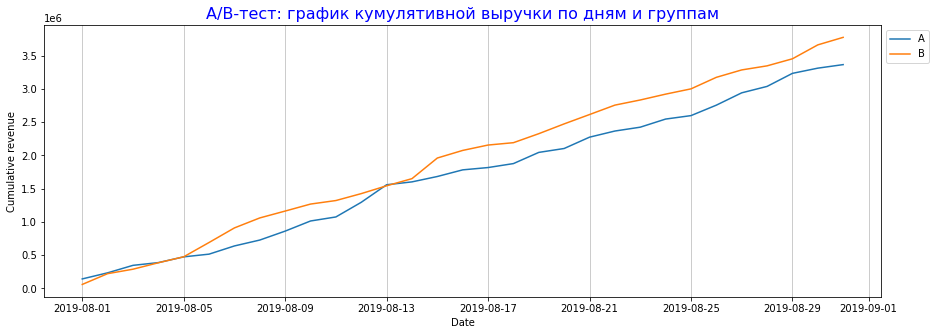

In [39]:
# построим график кумулятивной выручки по дням и группам А/В-теста без учета заказа с максимальной стоимостью
fig, ax = plt.subplots()

plt.plot(cum_revenue_a0['date'], cum_revenue_a0['revenue'], label='A')
plt.plot(cum_revenue_b0['date'], cum_revenue_b0['revenue'], label='B')

fig.set_figwidth(15)
fig.set_figheight(5)
plt.grid(True, axis='x', alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.title('А/В-тест: график кумулятивной выручки по дням и группам', size=16, color='blue')
plt.show;

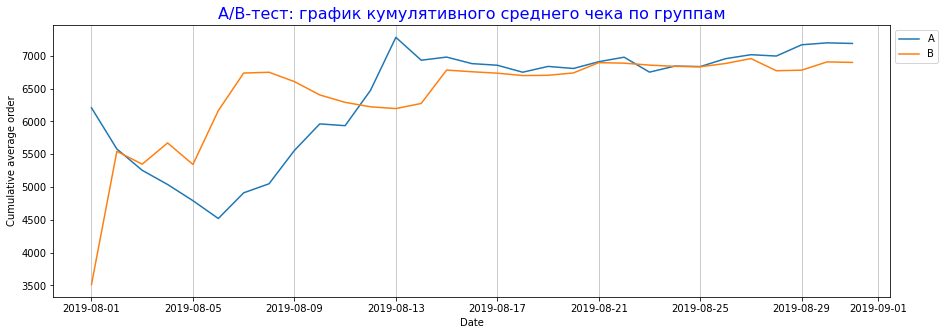

In [40]:
# построим график кумулятивного среднего чека по группам без учета заказа с максимальной стоимостью
fig, ax = plt.subplots()

plt.plot(cum_revenue_a0['date'], cum_revenue_a0['revenue']/cum_revenue_a0['orders'], label='A')
plt.plot(cum_revenue_b0['date'], cum_revenue_b0['revenue']/cum_revenue_b0['orders'], label='B')

plt.grid(True, axis='x', alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Cumulative average order')
plt.title('А/В-тест: график кумулятивного среднего чека по группам', size=16, color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show;

Картина поменялась, кумулятивная выручка в В-группе больше, чем в А-группе. А вот средний чек в группах почти одинаковый, в последние дни тестового периода средний чек А-группы выше, чем в В-группе. Таким образом, повышенная выручка в В-группе связана не со средним чеком, а с количеством заказов. 

## Анализ относительного изменения кумулятивного среднего чека группы B к группе A

In [41]:
# соберем агрегированные данные о выручке по двум группам в один датасее

cum_revenue_all = (
    cum_revenue_a.merge(cum_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)
cum_revenue_all.head(2)

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40


<a id='two'></a>
[Вернуться к выводу](#last)

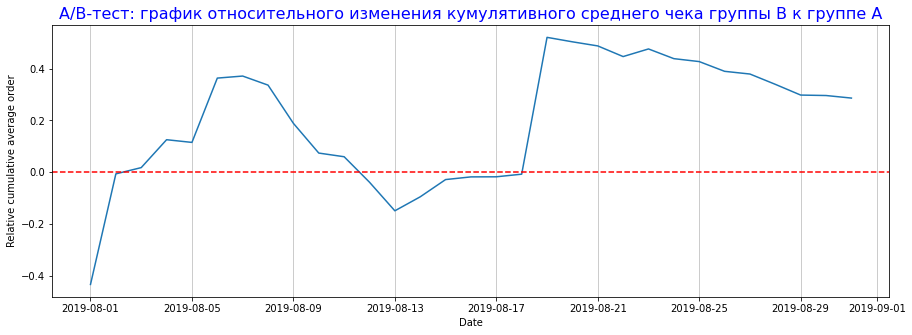

In [42]:
# построим график относительного изменения кумулятивного среднего чека группы В к группе А
fig, ax = plt.subplots()

plt.plot(cum_revenue_all['date'], (cum_revenue_all['revenue_b']/cum_revenue_all['orders_b'])/(cum_revenue_all['revenue_a']/cum_revenue_all['orders_a'])-1)

plt.grid(True, axis='x', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Relative cumulative average order')
plt.title('А/В-тест: график относительного изменения кумулятивного среднего чека группы В к группе А', size=16, color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.axhline(y=0, color='red', linestyle='--')
plt.show;

**Вывод:**

- большую часть времени в течение теста кумулятивный средний чек В-группы выше, чем кумулятивный средний чек А-группы;
- в нескольких точках график  резко «скачет», что еще раз подтверждает наличие крупных заказов/выбросов в В-группе. 

## Анализ кумулятивного среднего количества заказов на посетителя по группам

In [43]:
# создадим для каждой группы датафрейм с кумулятивными агрегированными данными о количестве заказов и количестве посетителей 

cum_orders_a = cumulative_data[cumulative_data['group']=='A'][['date', 'orders', 'visitors']]
cum_orders_b = cumulative_data[cumulative_data['group']=='B'][['date', 'orders', 'visitors']]

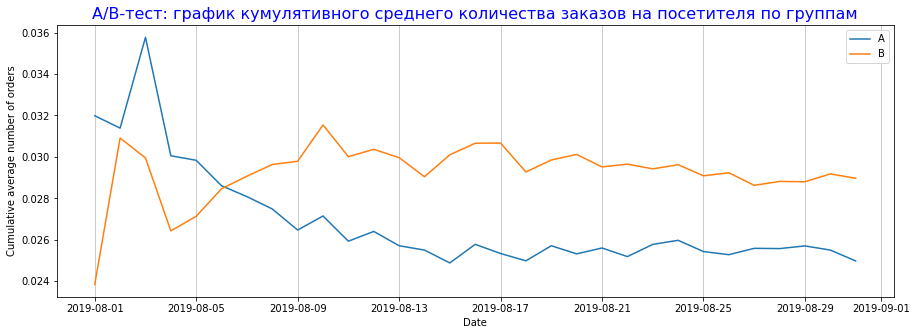

In [44]:
# построим график кумулятивного среднего количества заказов на посетителя по группам

fig, ax = plt.subplots()

plt.plot(cum_orders_a['date'], cum_orders_a['orders']/cum_orders_a['visitors'], label='A')
plt.plot(cum_orders_b['date'], cum_orders_b['orders']/cum_orders_b['visitors'], label='B')

plt.grid(True, axis='x', alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Cumulative average number of orders')
plt.title('А/В-тест: график кумулятивного среднего количества заказов на посетителя по группам', size=16, color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show;

In [45]:
# посчитаем кумулятивное среднее количество заказов на одного посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data.head(2)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843


In [46]:
# разделим данные по группам
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

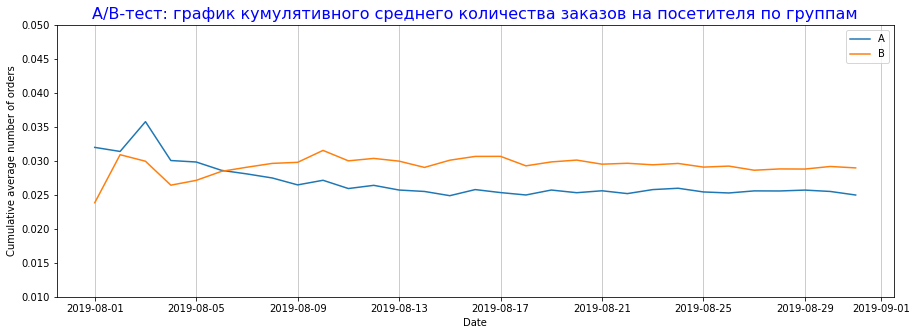

In [47]:
# построим график кумулятивного среднего количества заказов на посетителя по группам

fig, ax = plt.subplots()

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.grid(True, axis='x', alpha=0.8)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Cumulative average number of orders')
plt.title('А/В-тест: график кумулятивного среднего количества заказов на посетителя по группам', size=16, color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.ylim(0.01, 0.05)
#fig.autofmt_xdate()
#plt.axis(["2019-08-01", "2019-08-31", 0.01, 0.05])
plt.show;

**Вывод:**

График ПОЧТИ симметричный, колебания идут вокруг одного значения. Однако 6 августа произошла смена лидера: кумулятивное среднее количество заказов на одного посетителя в В-группе превысило одноименный показатель А-группы, эта ситуация сохранилась до конца тестового периода.

## Анализ относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [48]:
# объединим в один датафрейм данные о кумулятивном среднем количестве заказов на посетителя по группам

cum_conversion = (
    cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']], 
                                left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
)
cum_conversion.head(2)

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912


<a id='one'></a>
[Вернуться к выводу](#last)

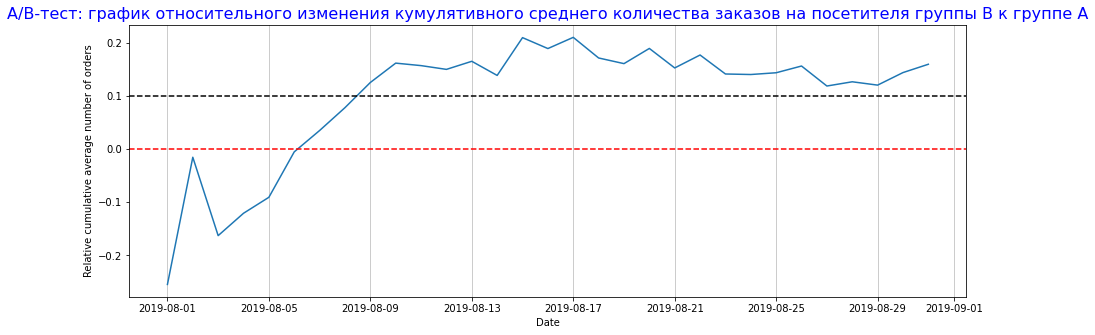

In [49]:
# построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

fig, ax = plt.subplots()

plt.plot(cum_conversion['date'], cum_conversion['conversion_b']/cum_conversion['conversion_a']-1)

plt.grid(True, axis='x', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Relative cumulative average number of orders')
plt.title('А/В-тест: график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', size=16, color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.show;

**Вывод:**

В начале теста В-группа проигрывала А-группе, но с 06 августа вырвалась вперёд. Достигнув пика 14-15 августа кумулятивное среднее количество заказов на посетителя В-группы по отношению к А-группе начало коррекцию вниз, с 29 августа опять наметилась тенденция к его росту.

Без анализа аномалий выводы по тесту нельзя, так как результаты могут измениться. 

## Анализ точечного графика количества заказов по пользователям

Для анализа количества заказов на одного пользователя мне придется рассмотреть два датасета orders: старый - до удаления пользователей, попавших одновременно в обе группы А/В теста, и новая - очищенная от вышеупомянутых пользователей.

In [50]:
# создадим вспомогательный датафрейм: количество заказов на одного пользователя (до удаления парных клиентов в п. 2.1.1.)

orders_by_user_old = orders_old.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_user_old.columns = ['visitor_id', 'orders_count']
orders_by_user_old.sort_values(by='orders_count', ascending=False).head()

,visitor_id,orders_count
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


In [51]:
# посмотрим какое количество пользователей совершили только один заказ за период теста, два заказа и тд...
orders_by_user_old['orders_count'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
8       1
9       1
Name: orders_count, dtype: int64

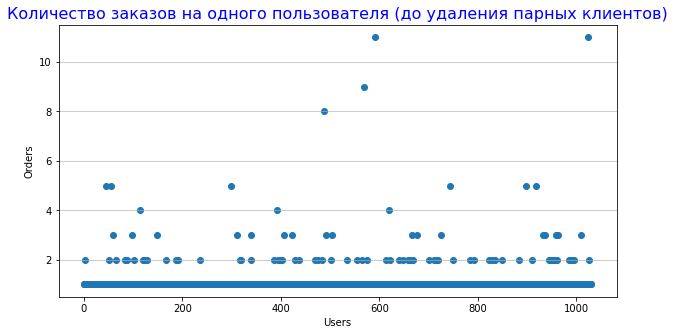

In [52]:
# построим точечного график количество заказов на одного пользователя (до удаления парных клиентов)

fig, ax = plt.subplots()

x_values = pd.Series(range(0,len(orders_by_user_old)))
plt.scatter(x_values, orders_by_user_old['orders_count'])
plt.xlabel('Users')
plt.ylabel('Orders')
plt.title('Количество заказов на одного пользователя (до удаления парных клиентов)', size=16, color='blue')
fig.set_figwidth(10)
fig.set_figheight(5)
plt.grid(True, axis='y', alpha=0.8)
plt.show;

In [53]:
# создадим вспомогательный датафрейм: количество заказов на одного пользователя (после удаления парных клиентов в п. 2.1.1)

orders_by_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_user.columns = ['visitor_id', 'orders_count']
orders_by_user.sort_values(by='orders_count', ascending=False).head(2)

,visitor_id,orders_count
908,3967698036,3
55,249864742,3


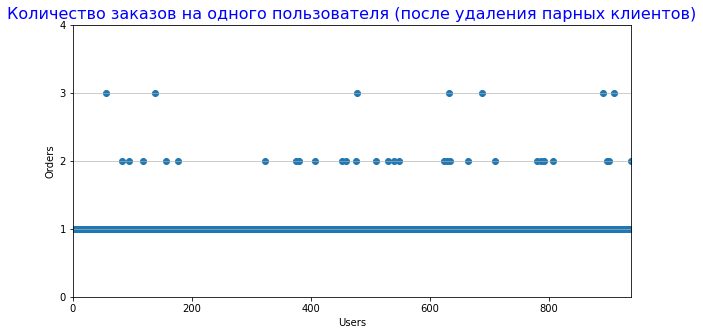

In [54]:
# построим точечного график количество заказов на одного пользователя (после удаления парных клиентов)

fig, ax = plt.subplots()

x_values = pd.Series(range(0,len(orders_by_user)))
plt.scatter(x_values, orders_by_user['orders_count'])
plt.xlabel('Users')
plt.ylabel('Orders')
plt.title('Количество заказов на одного пользователя (после удаления парных клиентов)', size=16, color='blue')
fig.set_figwidth(10)
fig.set_figheight(5)
plt.grid(True, axis='y', alpha=0.8)
#plt.ylim([0, 4])
plt.yticks(np.arange(0,5,1))
plt.xlim([0, 937])
plt.show;

<a id='twelve'></a>
[К выводу](#ten)

In [55]:
orders_by_user0 = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique', 'group':'first'})
orders_by_user0.columns = ['visitor_id', 'orders_count', 'group']
orders_by_user0[np.logical_and(orders_by_user0['group']=='A', orders_by_user0['orders_count']<3)]['orders_count'].mean().round(4)

1.0295

In [56]:
orders_by_user0 = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique', 'group':'first'})
orders_by_user0.columns = ['visitor_id', 'orders_count', 'group']
orders_by_user0[np.logical_and(orders_by_user0['group']=='B', orders_by_user0['orders_count']<3)]['orders_count'].mean().round(4)

1.0304

**Вывод:**

Основная масса пользователей оформляют 1 заказ.

Странная ситуация с пользователями, которых учитывали и в А-группе и в В-группе. Эти же пользователи совершали аномально большое количество заказов (до 11 заказов в течение тестового периода). Однако, после удаления этих пользователей в п.2.1.1. аномальных выбросов в количестве заказов на одного пользователя не стало. Максимальное количество заказов на одного пользователя в очищенной выборке равно 3.

## Расчет границы для определения аномальных пользователей

Вариантов количества заказов на одного пользователя в тестовом периоде не много, всего 3. Поэтому удобно использовать не только np.percentile, но и value_counts()

In [57]:
# посмотрим какое количество пользователей совершили только один заказ за период теста, два заказа и тд...
orders_by_user['orders_count'].value_counts()

1    937
2     29
3      7
Name: orders_count, dtype: int64

<a id='three'></a>
[Ссылка код, удалящий выбросы](#four)

In [58]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя:
percentile_orders_count = np.percentile(orders_by_user['orders_count'], [90, 96, 97, 99])
percentile_orders_count

array([1., 1., 2., 2.])

In [59]:
limit_orders_count = percentile_orders_count[2]
limit_orders_count

2.0

**Вывод:**

Более 96% посетителей нашего онлайн-магазина оформили за анализируемый период один заказ. Не более 4% оформляли 2-3 заказа.
Я не считаю 2-3 заказа аномальным количеством заказов на одного пользователя, но для чистоты эксперемента (проекта) можно принять 2 заказа за верхнюю границу числа заказов и далее отсеять по ней "аномальных" пользователй.

## Анализ точечного графика стоимостей заказов

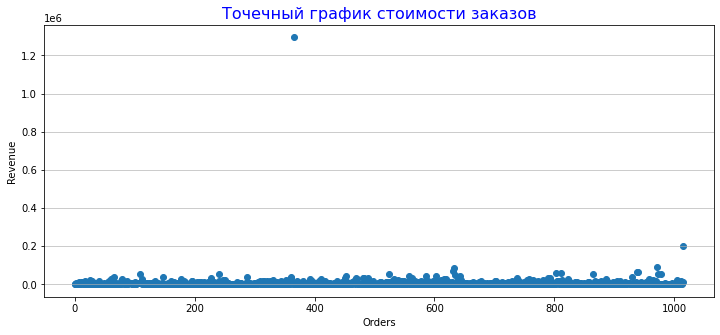

In [60]:
# построим точечный график  стоимостей заказов

fig, ax = plt.subplots()

x_values_2 = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values_2, orders['revenue']) 

plt.xlabel('Orders')
plt.ylabel('Revenue')
plt.title('Точечный график стоимости заказов', size=16, color='blue')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid(True, axis='y', alpha=0.8)
plt.show;

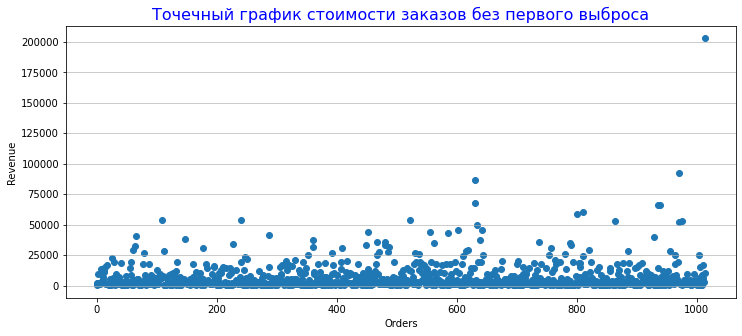

In [61]:
# построим точечный график  стоимостей заказов без первого выброса

fig, ax = plt.subplots()

x_values_2 = pd.Series(range(0,len(orders0['revenue'])))
plt.scatter(x_values_2, orders0['revenue']) 

plt.xlabel('Orders')
plt.ylabel('Revenue')
plt.title('Точечный график стоимости заказов без первого выброса', size=16, color='blue')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid(True, axis='y', alpha=0.8)
plt.show;

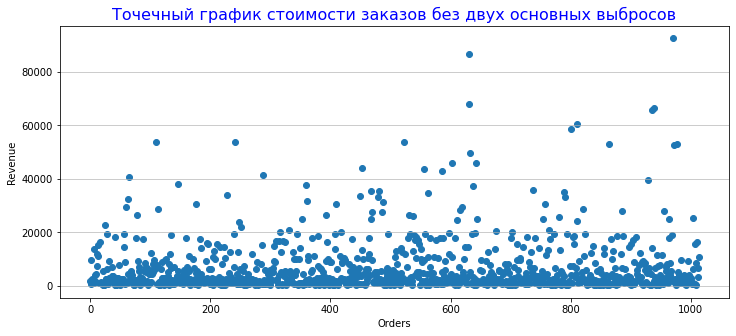

In [62]:
# построим точечный график  стоимостей заказов без двух основных выбросов
orders00 = orders0[orders0['revenue']!=orders0['revenue'].max()]

fig, ax = plt.subplots()

x_values_2 = pd.Series(range(0,len(orders00['revenue'])))
plt.scatter(x_values_2, orders00['revenue']) 

plt.xlabel('Orders')
plt.ylabel('Revenue')
plt.title('Точечный график стоимости заказов без двух основных выбросов', size=16, color='blue')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid(True, axis='y', alpha=0.8)
plt.show;

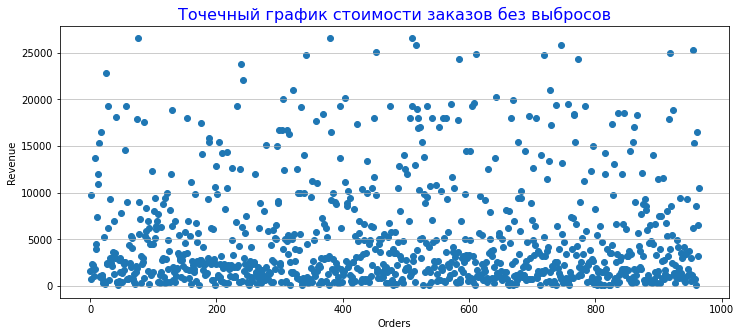

In [63]:
# построим точечный график  стоимостей заказов без выбросов
orders000 = orders0[orders0['revenue']<27000]

#увы, на данном этапе прищлось проставить 27000 руками. Но я помню, что это плохой тон.

fig, ax = plt.subplots()

x_values_2 = pd.Series(range(0,len(orders000['revenue'])))
plt.scatter(x_values_2, orders000['revenue']) 

plt.xlabel('Orders')
plt.ylabel('Revenue')
plt.title('Точечный график стоимости заказов без выбросов', size=16, color='blue')
fig.set_figwidth(12)
fig.set_figheight(5)
plt.grid(True, axis='y', alpha=0.8)
plt.show;

<a id='eleven'></a>
[К выводу](#ten)

In [64]:
# Расчет среднего чека в А-группе после удаления заказов с аномальной стоимостью в В-группе
orders000[orders000['group']=='A']['revenue'].mean().round()

5200.0

In [65]:
# Расчет среднего чека в В-группе после удаления заказов с аномальной стоимостью в В-группе 
orders000[orders000['group']=='B']['revenue'].mean().round()

4894.0

In [66]:
orders000['revenue'].describe()

count      965.000000
mean      5035.363731
std       5644.507129
min         50.000000
25%       1130.000000
50%       2670.000000
75%       6645.000000
max      26550.000000
Name: revenue, dtype: float64

In [67]:
# Изучим заказ с аномально высокой стоимостью
orders.loc[orders['revenue']==orders['revenue'].max()]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [68]:
# Изучим пятерку самых дорогих заказов
orders.sort_values(by = 'revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


**Выводы:**

Вот мы и нашли разгадку резкого скочка 19 августа на графике среднего кумулятивного чека в В-группе - это аномально крупный заказ от 19.08.2019 г на сумму 1 294 500 у.е., оформленный пользователем из В-группы.
Еще один аномально крупный заказ был сделан 15.08.2019 г. и тоже в В-группе. 

За исключением двух вышеуказанных заказов, стоимость других заказов не превышала 100 000 у.е.

Точную границу аномальной стоимости заказа определим далее.

## Расчет границы для определения аномальных заказов

In [69]:
# Изучим столбец orders['revenue'] с помощью ф-ции describe()
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

<a id='five'></a>
[Ссылка код, удалящий выбросы](#six)

In [70]:
# Определим 90, 95 и 99 перцентили среднего чека в выборке:
percentile_revenue = np.percentile(orders['revenue'], [90, 95, 99])
percentile_revenue

array([17990., 26785., 53904.])

In [71]:
limit_revenue = int((percentile_revenue[1]/1000).round())*1000
limit_revenue 

27000

Не более 5% заказов дороже 26785 у.е. и не более 1% дороже 53904 у.е.
С помощью персентилей выберем 26000 - 27000 у.е.  за верхнюю границу стоимости заказа,  аномальных пользователей отсеем по ней в следующем подразделе.

## Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

***Задача:*** 

посчитать статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным (без удаления аномальных пользователей), использовав критерий Манна-Уитни.

 **Сформулируем гипотезы:**
 
 - Н0: различий в среднем количестве заказов между группами нет;
 - Н1: различия в среднем между группами есть.

### Подготовка данных

создадим сводный датафрейм df1

In [72]:
# Создадим промежуточную таблицу visitorsADaily для А-группы: дата - кол-во пользователей
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(2)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619


In [73]:
# Создадим промежуточную таблицу visitorsBDaily для В-группы: дата - кол-во пользователей
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head(2)

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581


### Посчитаем статистическую значимость различия в среднем количестве заказов на посетителя между группами

In [74]:
# Создадим промежуточную таблицу ordersByUsersA для А-группы: userId - количество заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head(2)

,userId,orders
0,11685486,1
1,54447517,1


In [75]:
# Создадим промежуточную таблицу ordersByUsersB для B-группы: userId - количество заказов
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head(2)

,userId,orders
0,5114589,1
1,6958315,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [76]:
# Создадим переменную sampleA
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleA.head(2)

0    1
1    1
Name: orders, dtype: int64

In [77]:
# Создадим переменную sampleB
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB.head(2)

0    1
1    1
Name: orders, dtype: int64

In [78]:
# Проверим гипотезу Н0 с помощью критерия Манна-Уитни
alpha = 0.05
res = stats.mannwhitneyu(sampleA, sampleB)
print(f"p-значение для сравнения групп А и В: {res[1]:.3f}")
if res.pvalue<alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и В')
else:
    print('Не получилось отвергнуть Н0 для сравнения групп А и В')

p-значение для сравнения групп А и В: 0.011
Отвергаем нулевую гипотезу для сравнения групп А и В


In [79]:
# Выведем относительный прирост среднего числа заказов группы B
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'0.160'

**Вывод:**

p-value = 0.011, т.е. меньше уровня статистической значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами А и В нет, отвергаем. По «сырым» данным есть статистически значимые различия в среднем числе заказов групп A и B. 

Относительная развница в среднем числе заказов на пользователя около 16% (прирост группы B)

## Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

***Задача:*** 

посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным (без удаления аномальных пользователей), использовав критерий Манна-Уитни.

 **Сформулируем гипотезы:**
 
 - Н0:  различий в среднем чеке между группами нет;
 - Н1:  различия в среднем чеке между группами есть.

In [80]:
# Проверим гипотезу Н0 с помощью критерия Манна-Уитни
alpha = 0.05
res = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print(f"p-значение для сравнения групп А и В: {res[1]:.3f}")
if res.pvalue<alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и В')
else:
    print('Не получилось отвергнуть Н0 для сравнения групп А и В')

p-значение для сравнения групп А и В: 0.829
Не получилось отвергнуть Н0 для сравнения групп А и В


In [81]:
# Выведем относительный прирост среднего чека группы B
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.287


**Вывод:**

P-value 0.829 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек В-группы значительно выше среднего чека А-группы - на 28.7%, что связано с выявленными ранее аномально крупными заказами.

## Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил более 2 заказов (п.2.8) или совершил заказ дороже 27 000 у.е. (п. 2.10). 

Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

[Ссылка на расчет границы аномального числа заказов](#three)
<a id='four'></a>

In [82]:
# Сделаем срезы пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > limit_orders_count]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > limit_orders_count]['userId'],
    ],
    axis=0,
)
usersWithManyOrders.head(2)

58      611059232
211    2108163459
Name: userId, dtype: int64

[Ссылка на расчет границы аномальной стоимости заказа](#five)
<a id='six'></a>

In [83]:
# Сделаем срезы пользователей, совершивших заказы дороже 27 000 у.е.
usersWithExpensiveOrders = orders[orders['revenue'] > limit_revenue ]['visitor_id']
usersWithExpensiveOrders.head(2)

73    2947100995
77     787824685
Name: visitor_id, dtype: int64

In [84]:
# Объединим usersWithExpensiveOrders и  usersWithManyOrders в таблице abnormalUsers
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(2)

568     113298937
1099    148427295
dtype: int64

In [85]:
# Узнаем, сколько всего аномальных пользователей 
abnormalUsers.shape[0]

58

Всего 58 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

In [86]:
# Подготовим выборки количества заказов по пользователям по группе А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleAFiltered.head(2)

0    1
1    1
Name: orders, dtype: int64

In [87]:
# Подготовим выборки количества заказов по пользователям по группе B
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
sampleBFiltered.head(2)

0    1
1    1
Name: orders, dtype: int64

In [88]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:

alpha = 0.05
res = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print(f"p-значение для сравнения групп А и В: {res[1]:.3f}")
if res.pvalue<alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и В')
else:
    print('Не получилось отвергнуть Н0 для сравнения групп А и В')

p-значение для сравнения групп А и В: 0.012
Отвергаем нулевую гипотезу для сравнения групп А и В


In [89]:
# Выведем относительный прирост среднего числа заказов группы B
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.182


**Вывод:**

Результаты по среднему количеству заказов практически не изменились. 
p-value = 0.012 (против 0.011 по "неочищенным" данным), т.е. меньше уровня статистической значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами А и В нет, отвергаем. По «очищенным» данным есть статистически значимые различия в среднем числе заказов групп A и B.

Относительная развница в среднем числе заказов на пользователя около 18% (против 16% по "неочищенным" данным) (прирост группы B)

## Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [90]:
# Проверим гипотезу Н0 с помощью критерия Манна-Уитни
alpha = 0.05
res = stats.mannwhitneyu(
    orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
)
print(f"p-значение для сравнения групп А и В: {res[1]:.3f}")
if res.pvalue<alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и В')
else:
    print('Не получилось отвергнуть Н0 для сравнения групп А и В')

p-значение для сравнения групп А и В: 0.646
Не получилось отвергнуть Н0 для сравнения групп А и В


In [91]:
# Выведем относительный прирост среднего чека группы B
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

-0.048


**Вывод:**


P-value снизился до 0.646 (против 0.829 по "неочищенным" данным), однако остался значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По очищенным данным статистически значимых различий среднего чека между группами нет.

А вот показатель относительного прироста среднего чека группы B изменился существенно: был прирост 28.7%, стал проигрыш группы В - 4.8%. Этот пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста!

## Выводы и решение по результатам теста 

**Выводы по результатам А/В теста:**

- есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по очищенным от  аномалий данным;
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- график различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A, однако однозначной тенденции к дальнейшему улучшению нет [ссылка](#one);
- график различия среднего чека показывает резкие колебания, вызванные аномально дорогими заказами в В-группе, делать выводы по данному графику нельзя [ссылка](#two).
<a id='last'></a>

**Решение:**

Исходя из обнаруженных фактов, тест можно остановить, признав тестируемое изменение успешным. 

Основание: 

- наличие статистически значимого различия по по среднему количеству заказов на пользователя между группами, относительный прирост конверсии группы B около 18%;
- завершение А/В теста с признанием победы В-группы и принятие тестируемого изменения в экплуатацию позволят увеличить выручку. Рассчетный прирост выручки составит 987511 у.е. в месяц.


<a id='ten'></a>
Расчет прироста месячной выручки, который может быть получен в результате внедрения тестируемого изменения:

- среднедневное количество пользователей в А-группе: 604 чел. [к расчету показателя](#nine)
- среднедневное количество пользователей в B-группе: 610 чел. [к расчету показателя](#nine)
- средний чек в А-группе: 5200 у.е.[к расчету показателя](#eleven)
- средний чек в В-группе после удаления заказа с аномальной стоимостью: 4894 у.е.[к расчету показателя](#eleven)
- среднее количество заказов на 1 пользователя А-группа: 1.0295 шт. [к расчету показателя](#twelve)
- среднее количество заказов на 1 пользователя В-группа: 1.0304 шт. [к расчету показателя](#twelve)
- среднее количество дней в месяце: 30
- ожидаемый прирост выручки = (610 * 1.0304 - 604 * 1.0295) * 30 * 4894=987511 у.е. 

средний чек игнорируем в расчете, так как нет статистически значимого различия по среднему чеку между группами.

<a id='eight'></a>
[В начало](#seven)

# Чек-лист готовности проекта

- [x]  открыты 3 файла;
- [x]  файлы изучены (выведены первые строки, метод info(), метод describe());
- [x]  названия столбцов приведины к стандартному виду;
- [x]  пропуски, дубликаты, сомнительные данные не обнаружены;
- [x]  тип данных в столбцах соответствует данным;
- [x]  проведена приоритизация гипотез с помощью фреймворка ICE;
- [x]  проведена приоритизация гипотез с помощью фреймворка RICE;
- [x]  составлена таблица приоритизации гипотез;
- [x]  проведен анализ кумулятивной выручки по группам;
- [x]  проведен анализ кумулятивного среднего чека по группам;
- [x]  проведен анализ относительного изменения кумулятивного среднего чека группы B к группе A;
- [x]  проведен анализ кумулятивного среднего количества заказов на посетителя по группам;
- [x]  проведен анализ относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
- [x]  проведен анализ точечного графика количества заказов по пользователям;
- [x]  проведен расчет границы для определения аномальных пользователей;
- [x]  проведен анализ точечного графика стоимостей заказов;
- [x]  проведен расчет границы для определения аномальных заказов;
- [x]  проведен расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- [x]  проведен расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным;
- [x]  проведен расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- [x]  проведен расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным;
- [x]  обоснована целесообразность продолжения/остановки А/В-теста.